   MINI ML PROJECT: IRIS CLASSIFICATION 

[Step 1] Loading Dataset...
Dataset successfully loaded. First 5 rows:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species species_name  
0        0       setosa  
1        0       setosa  
2        0       setosa  
3        0       setosa  
4        0       setosa  

[Step 2] Preprocessing Data...
Data split completed: 120 training samples, 30 testing samples.
Data normalization (scaling) completed.

[Step 3] Training K-Nearest Neighbors (KNN) Model...
Model trained using k=3 neighbors.

[Step 4] Evaluating Model...
A

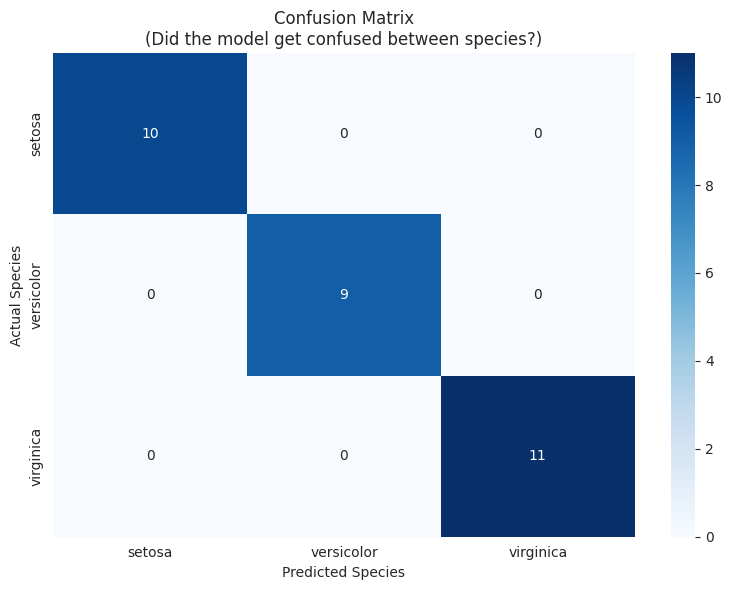

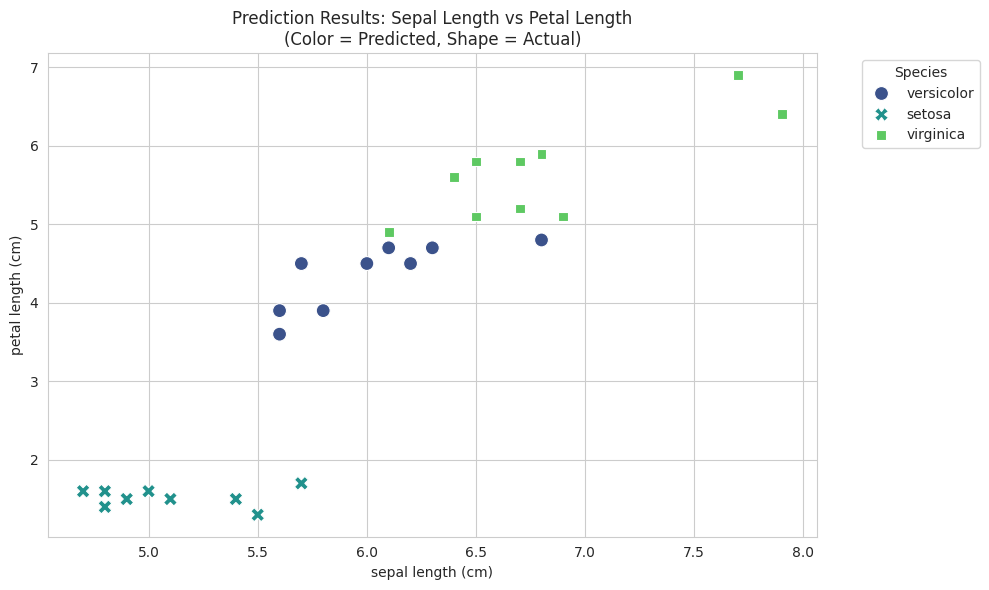

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn modules for ML tasks
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

def run_ml_experiment():
    print("========================================")
    print("   MINI ML PROJECT: IRIS CLASSIFICATION ")
    print("========================================")

    # ---------------------------------------------------------
    # STEP 1: Dataset Selection & Loading
    # ---------------------------------------------------------
    print("\n[Step 1] Loading Dataset...")
    # Load the built-in Iris dataset
    iris = load_iris()

    # Create a pandas DataFrame for better readability
    df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
    df['species'] = iris.target  # Add the target column (0, 1, 2)

    # Map the numeric target to actual species names for clarity
    df['species_name'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

    print("Dataset successfully loaded. First 5 rows:")
    print(df.head())

    # ---------------------------------------------------------
    # STEP 2: Data Preprocessing
    # ---------------------------------------------------------
    print("\n[Step 2] Preprocessing Data...")

    # Split features (X) and target (y)
    X = iris.data
    y = iris.target

    # Split into Training and Testing sets (80% Train, 20% Test)
    # random_state=42 ensures the split is the same every time we run the code
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print(f"Data split completed: {len(X_train)} training samples, {len(X_test)} testing samples.")

    # Scale the features (Normalization)
    # This ensures that features with larger values don't dominate the distance calculation
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    print("Data normalization (scaling) completed.")

    # ---------------------------------------------------------
    # STEP 3: Model Building
    # ---------------------------------------------------------
    print("\n[Step 3] Training K-Nearest Neighbors (KNN) Model...")

    # Initialize the KNN classifier with k=3 neighbors
    k = 3
    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the model using the scaled training data
    knn.fit(X_train_scaled, y_train)
    print(f"Model trained using k={k} neighbors.")

    # ---------------------------------------------------------
    # STEP 4: Evaluation
    # ---------------------------------------------------------
    print("\n[Step 4] Evaluating Model...")

    # Make predictions on the test set
    y_pred = knn.predict(X_test_scaled)

    # Calculate accuracy
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy Score: {acc * 100:.2f}%")

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=iris.target_names))

    # ---------------------------------------------------------
    # STEP 5: Result Visualization
    # ---------------------------------------------------------
    print("\n[Step 5] Generating Visualizations...")
    print("Please check the popup windows for charts.")

    # Set the visual style
    sns.set_style("whitegrid")

    # --- Chart 1: Confusion Matrix ---
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=iris.target_names, yticklabels=iris.target_names)
    plt.title('Confusion Matrix\n(Did the model get confused between species?)')
    plt.ylabel('Actual Species')
    plt.xlabel('Predicted Species')
    plt.tight_layout()
    plt.show()

    # --- Chart 2: Scatter Plot of Results ---
    # We visualize the Test set. We use the original (unscaled) X_test for plot axes so units make sense.
    # We color the points based on the Prediction to see how the model grouped them.

    # Convert X_test back to DataFrame for easy plotting
    X_test_df = pd.DataFrame(X_test, columns=iris.feature_names)

    # Create the plot using just two features: Sepal Length vs Petal Length
    plt.figure(figsize=(10, 6))
    scatter = sns.scatterplot(
        x=X_test_df['sepal length (cm)'],
        y=X_test_df['petal length (cm)'],
        hue=iris.target_names[y_pred], # Color by PREDICTED class
        style=iris.target_names[y_test], # Shape by ACTUAL class (to spot errors)
        palette='viridis',
        s=100
    )

    plt.title('Prediction Results: Sepal Length vs Petal Length\n(Color = Predicted, Shape = Actual)')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Species')
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    run_ml_experiment()